Breast Cancer Wisconsin (Diagnostic) Data Set

! pip install keras

In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output


In [3]:
# Read the data file

data = pd.read_excel('minibatch.xlsx')
data.head()


,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,minibatch
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


In [4]:
# Cleaning and modifying the data
data = data.drop('Unnamed: 0',axis=1)

# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:23]))
datas.columns = list(data.iloc[:,1:23].columns)
datas['minibatch'] = data['minibatch']

# Creating the high dimensional feature space X
data_drop = datas.drop('minibatch',axis=1)
X = data_drop.values
Y=data['minibatch'] 


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)


## Bulding CNN

### keras + Dense + Conv2D + Flatten

In [6]:
# Create a feed forward neural network with 3 hidden layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD

#create model
model = Sequential()

#add CNN model layers
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_dim=22))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='softmax'))



In [7]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
#model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,validation_split=0.33)


In [9]:
#show predictions for the first 3 images in the test set
#model1.predict(X_test[:4])


In [10]:
#show actual results for the first 3 images in the test set
#y_test[:4]

In [11]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [12]:


# Fit and test the model by randomly splitting it 
# 67% of the data for training and 33% of the data for validation
#history=model.fit(X, datas['minibatch'], batch_size=5, epochs=10,validation_split=0.33)


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 1)                 18433     
                                                                 
Total params: 37,537
Trainable params: 37,537
Non-trainable params: 0
_________________________________________________________________


pip install visualkeras

In [9]:
import visualkeras

In [10]:
from PIL import ImageFont


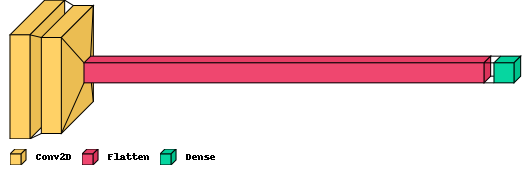

In [12]:
visualkeras.layered_view(model, legend=True)